>Андрей, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>**
>
>**<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>**
>  
> **<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Предлагаю быть в диалоге, и, пожалуйста, не удаляй и не переноси мои комментарии, а также выделяй свои новые комментарии цветом (например, синим) — это позволит лучше ориентироваться при возможных повторных проверках.

# Определение перспективного тарифа для телеком компании

<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [0. Описание проекта](#0.)
    - [0.1. Описание тарифов](#0.1)
    
* [1. Загрузка данных](#1.)
     - [1.1. Вывод по данным](#1.1)

* [2. Предобработка данных](#2.)
     - [2.1. Изменение типа данных](#2.1)
     - [2.2. 'Исправление ошибок в звонках и интернет сессиях'](#2.2)
     - [2.3. 'Округление минут'](#2.3)
     - [3. Добавление новых столбцов в таблицу](#3.)
     - [3.1. Количество звонков, интернета, сообщений](#3.1)
     - [3.2. Объединение таблиц](#3.2)
     - [3.3. Добавление цены](#3.3)
     - [3.4. Вывод](#3.4)
     
* [4. Анализ данных](#4.)
     - [4.1. Минуты](#4.1)
     - [4.2. Интернет](#4.2)
     - [4.3. Сообщения](#4.3)
     - [4.4. Доход](#4.4)
     
* [5. Проверка гипотез ](#5.)
     - [5.1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#5.1)
     - [5.2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#5.2)

* [6. Вывод](#6.) 

# Описание проекта
<a name="0."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
<a name="0.1"></a>

Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

>**<span style="color:green">Интерактивное оглавление в проектах `jupyter notebook` и подробное описание работы — отличная практика. Так держать! ;)</span>**


## Зарузка данных
<a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
#загружаю необходимые библотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Звонки

In [2]:
#загружаю таблицу со звонками
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# смотрю общую информацию по звонкам
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#смотрю пропуски в звонках
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Интернет

In [5]:
# загружаю таблицу с информацией об интернет-сессиях
df_internet = pd.read_csv('/datasets/internet.csv')
display(df_internet.head(202607))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [6]:
# смотрю общую информацию по интернету 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# смотрю на количество пропусков 
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Сообщения

In [8]:
# загружаю таблицу с сообщеиями 
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages .head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
#смотрю общую информацию
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
# смотрю количество пропусков 
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

Тарифы

In [11]:
# загружаю информацию по тарифам 
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
#смотрю общую информацию
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
#смотрю количество пропусков 
df_tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Пользователи

In [14]:
# загружаю данные о юзерах
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
# смотрю общую информацию
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
# смотрю количество пропусков
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [17]:
print('Перестали пользоваться тарифом',(len(df_users) - df_users['churn_date'].isna().sum()),'человек')

Перестали пользоваться тарифом 38 человек


Вывод по данным
<a name="1.1"></a>

* Я загрузил 4 таблицы.
* Нужно изменить формат вывода даты во всех таблицах.
* Нужно изменить имя столбца 'tariff_name' в df_tariffs на 'tariff'.
* Нужно в таблице df_internet удалить столбец 'Unnamed: 0', в которого нет в описании проекта, он просто дублирует номер строки. 
* Нужно округлить минуты и мегабайты в большую сторону 
* Пропуски есть только в df_users, они связаны с тем, что пользователи всё ещё используют тариф.
* У нас есть 500 юзеров и они в разной степени пользуются звонками(202607), сообщениями(123036) и интернетом(149396).
* 38 из них перестали пользоваться своим тарифом вообще.


>**<span style="color:green">Здесь всё структурировано и по делу, класс. </span>**
>


## Предобработка данных
<a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Изменение типа данных
<a name="2.1"></a><br/>

In [18]:
# изменяю  тип данных в таблице пользователей 
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
# изменяю  тип данных в таблице звонков
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
# изменяю  тип данных в таблице интернет-сессий
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# изменяю  тип данных в таблице сообщений
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

>**<span style="color:orange">Совет на будущее: подобные однотипные операции лучше оборачивать в циклы/функции — это очень сильно повысит читаемость твоего кода и будет экономить тебе самому массу времени.</span>**

In [19]:
#проверяю
df_users.info()
df_calls.info()
df_internet.info()
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used    

Изменяю имя столбца 'tariff_name'

In [20]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [21]:
#проверяю
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [22]:
df_internet = df_internet.drop(columns=['Unnamed: 0'])
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Исправление ошибок в звонках и интернет сессиях
<a name="2.2"></a><br/>

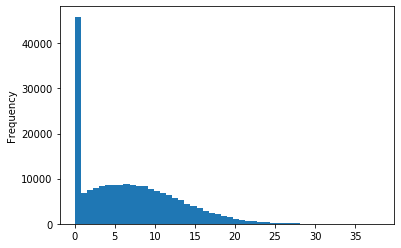

In [23]:
df_calls['duration'].plot(kind='hist', bins= 50)
plt.show()

На этом графике видно, что в данных очень много звонков с нулевой длительностью. Скорее всего это связано с тем, что люди не могут дозвониться и звонок по сути не начинается. Я уберу эти нулевые значения, так как они в дальнейшем могут мне помешать.

>**<span style="color:green">Полностью согласен с твоей аргументацией, поскольку данные звонки не тарифицируются мы можем смело их удалить из нашей выборки.</span>**

In [24]:
#заменяю на NaN все звонки нулевой длительности
df_calls['duration'] = df_calls['duration'].replace(0, np.NaN)
df_calls = df_calls.dropna()

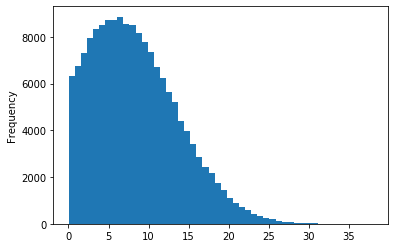

In [25]:
#новый график длительности звлнков 
df_calls['duration'].plot(kind='hist', bins= 50)
plt.show()

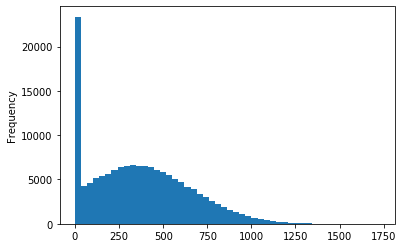

In [26]:

df_internet['mb_used'].plot(kind='hist', bins= 50)
plt.show()

In [27]:
df_internet['mb_used'] = df_internet['mb_used'].replace(0, np.NaN)
df_internet = df_internet.dropna()

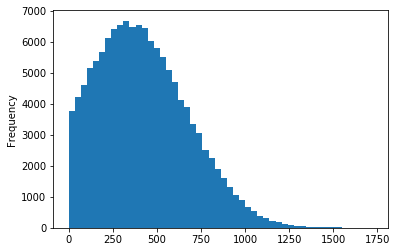

In [28]:
df_internet['mb_used'].plot(kind='hist', bins= 50)
plt.show()

Округление минут
<a name="2.3"></a><br/>

In [29]:
# округляю минуты и перевожу в тип int
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [30]:
# округляю мегабайты и перевожу в тип int
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')

>**<span style="color:green">Очень круто, что ты используешь именно функцию `numpy.ceil()` для округления наших звонков и интернет-сессий вверх и применяешь ее напрямую к столбцам (это самый быстроработающий способ). Молодец!</span>**

In [31]:
df_internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149390,1499_151,753,2018-10-11,1499
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149394,1499_155,1247,2018-11-26,1499


In [32]:
df_calls.info()
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


>**<span style="color:green">По предобработке данных у тебя все хорошо, отдельно отмечу твой комплексный подход к этому мероприятию.</span>**

>**<span style="color:orange">~~P.S.: в интернет-сессиях также есть нулевые значения, их бы хорошо тоже как-то проанализировать и обработать.~~</span>**

Добавление новых столбцов 
<a name="3."></a><br/>

Количество звонков и израсходаваных минут
<a name="3.1"></a><br/>

Создаю столбцы с количеством сделанных звонков и израсходованных минут разговора по месяцам

In [33]:
#добавляю столбец с месяцем для звонков
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()


,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9


In [34]:
# добавляю количество звонков и сумму минут
pivot_df_calls = pd.pivot_table(df_calls, index = ['user_id', 'month'], values = 'duration',  aggfunc=('sum', 'count')).reset_index()
display(pivot_df_calls)

,user_id,month,count,sum
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612


Номер месяца для интернета

In [35]:
#добавляю значение месяца для интернета
df_internet['month'] = df_internet['session_date'].dt.month
df_internet

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149390,1499_151,753,2018-10-11,1499,10
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149394,1499_155,1247,2018-11-26,1499,11


In [36]:
# добавляю количство мегабайт
pivot_df_internet = pd.pivot_table(df_internet, index = ['user_id', 'month'],  aggfunc=('sum')).reset_index()
pivot_df_internet.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [37]:
#добавляю значение месяца для сообщений
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [38]:
#добавляю количество сообщений в месяц
pivot_df_messages = pd.pivot_table(df_messages, index = ['user_id', 'month'],values = 'id', aggfunc='count').reset_index()
display(pivot_df_messages.head())

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Объединяю столбцы
<a name="3.2"></a><br/>

In [39]:
merge_C_and_I = pivot_df_calls.merge(pivot_df_internet, on= ['user_id', 'month'], how= 'outer')
merge_C_and_I_and_M = merge_C_and_I.merge(pivot_df_messages, on= ['user_id', 'month'], how= 'outer')
merge_C_and_I_and_M_and_U = merge_C_and_I_and_M.merge(df_users, on= ['user_id'], how= 'left')
merge_C_and_I_and_M_and_U_and_T = merge_C_and_I_and_M_and_U.merge(df_tariffs, on= ['tariff'], how= 'left')
df_new=merge_C_and_I_and_M_and_U_and_T
display(df_new)

,user_id,month,count,sum,mb_used,id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,2256.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,23257.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,14016.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,14070.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,14581.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,17232.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,19588.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,17516.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3



>**<span style="color:green">По агрегации данных и объединению таблиц у тебя полный порядок. Молодец что используешь метод `outer` при объединении таблиц по звонкам, сообщениям и трафике. Это позволило тебе учесть всех пользователей, даже если они не пользовались какой-либо из услуг в рамках одного месяца. Напрмер, пользователь может пользоваться планшетом - не совершать звонки, но при этом активно использовать интернет и т.д. </span>**


In [40]:
#переименновываю стобцы 
df_new = df_new.rename(columns={'count': 'count_calls',
                       'sum': 'total_minutes',
                       'mb_used':'mb',
                       'id':'sms'})

In [41]:
display(df_new)

,user_id,month,count_calls,total_minutes,mb,sms,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,2256.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,23257.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,14016.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,14070.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,14581.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,17232.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,19588.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,17516.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [42]:
# смотрю пропуски
df_new.isna().sum()

user_id                     0
month                       0
count_calls                46
total_minutes              46
mb                         13
sms                       497
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Ничего необычного. все нормально. Кажется, я сделал всё правильно. 46 пропусков в звонках и 46 пропусков в минутах, 11 пропусков по интернету и 497 пропусков по сообщения. Вполне вероятно, что люди не пользовались этими услугами. 

In [43]:
#заменяю пропуски нулями
df_new['count_calls'] = df_new['count_calls'].fillna(0)
df_new['total_minutes'] = df_new['total_minutes'].fillna(0)
df_new['mb'] = df_new['mb'].fillna(0)
df_new['sms'] = df_new['sms'].fillna(0)

In [44]:
# смотрю пропуски
df_new.isna().sum()

user_id                     0
month                       0
count_calls                 0
total_minutes               0
mb                          0
sms                         0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
count_calls              3214 non-null float64
total_minutes            3214 non-null float64
mb                       3214 non-null float64
sms                      3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

In [46]:
df_new['mb'] = df_new['mb'].astype('int')

In [47]:
df_new['count_calls'] = df_new['count_calls'].astype('int')

In [48]:
df_new['total_minutes'] = df_new['total_minutes'].astype('int')

In [49]:
df_new['sms'] = df_new['sms'].astype('int')

In [50]:
# проверяю
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
count_calls              3214 non-null int64
total_minutes            3214 non-null int64
mb                       3214 non-null int64
sms                      3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute   

Добавление цены 
<a name="3.3"></a><br/>

In [51]:
def bill (row):    
    if row['minutes_included'] < row['total_minutes']:
        calls_bill = (row['total_minutes'] - row['minutes_included']) * row['rub_per_minute']
    else:
        calls_bill = 0
        
    if row['mb_per_month_included'] < row['mb']:
        internet_bill = ((row['mb'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']        
    else:
        internet_bill = 0
 
    if row['messages_included'] < row['sms']:
        message_bill = (row['sms'] - row['messages_included']) * row['rub_per_message'] 
    else:
        message_bill = 0
         
 
    total_bill =  row['rub_monthly_fee'] + calls_bill + internet_bill + message_bill
    return total_bill
 

In [52]:
df_new['bill'] = df_new.apply(bill, axis = 1).astype('int')
display(df_new)

,user_id,month,count_calls,total_minutes,mb,sms,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bill
0,1000,5,17,159,2256,22,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,28,172,23257,60,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,41,340,14016,75,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,42,408,14070,81,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,46,466,14581,57,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,11066,17,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,550
3210,1489,9,0,0,17232,32,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,915
3211,1489,10,0,0,19588,21,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1375
3212,1489,11,0,0,17516,20,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,971


Вывод: 
<a name="3.4"></a><br/>

* Я добавил новые столбцы с количеством сообщений, звонков и мегабайтов по месяцам.
* Рассчитал выручку с каждого пользователя сгласно тарифу по месяцам и объеденил все в одну таблицу.

>**<span style="color:green">Красивое решение с функцией строк для подсчёта выручки. Так держать! :) </span>**
>


## Анализ данных
<a name="4."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

<a name="4.1"></a><br/>
Сколько минут разговора нужно каждый месяц

In [53]:
# смотрю describe по тарифам 
df_new.pivot_table(index='tariff', columns='month', values='total_minutes').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,386.760499,495.934310
std,72.262004,77.450072
min,203.852941,297.125000
25%,382.304759,474.281331
50%,401.996739,510.552030
75%,426.754925,542.483250
max,478.560831,592.805755


>**<span style="color:orange">Я бы не стал дополнительно усреднять наши данные по месяцам, а анализировал бы все имеющиеся у нас данные. Они уже содержат в себе агрегацию по пользователю и месяцу, и особенно это критично с точки зрения оценок вариативности наших показателей (дисперсия, станд. отклонение).</span>**

Здесь видно, что в среднем пользователи тарифа ультра разговаривают больше.

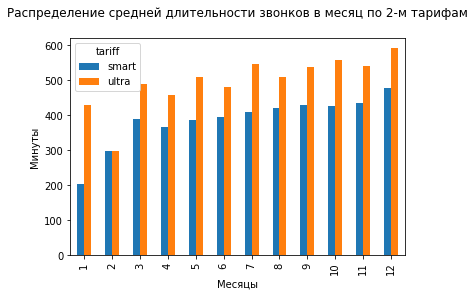

In [54]:
#строю график распределения по месяцам
(df_new
 .pivot_table(index='tariff', columns='month', values='total_minutes')
 .T
 .plot(kind='bar', alpha=1)
)
plt.title('Распределение средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')

plt.show()

Это видно и на графике, здесь вижу, что пользователи ультры всегда разговаривают больше, в феврале исключение, значения равны. Также вижу, что к концу года длительность разговара увеличивает и у смарта и у ультры.

In [55]:
# расчитываю СКО для звонков
std_calls = df_new.pivot_table(index='tariff', values='total_minutes', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_calls

,total_minutes
tariff,
smart,190.313730
ultra,317.606098
All,241.909978


In [56]:
#смотрю дисперсию
var_calls = df_new.pivot_table(index='tariff', values='total_minutes', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_calls

,total_minutes
tariff,
smart,36219.315784
ultra,100873.633397
All,58520.437688


Дисперсия у ultra гораздо больше, чем у smart, что говорит о том, что у пользователей ultra больше разброс по длительности разговоров.

In [57]:
### Код ревьювера ###

# более простой способ посчитать необходимые статистики сразу по двум тарифам

df_new.groupby('tariff').agg({'total_minutes': ['mean', np.std, np.var]}).T

tariff                     smart          ultra
total_minutes mean    417.934948     526.623350
              std     190.313730     317.606098
              var   36219.315784  100873.633397

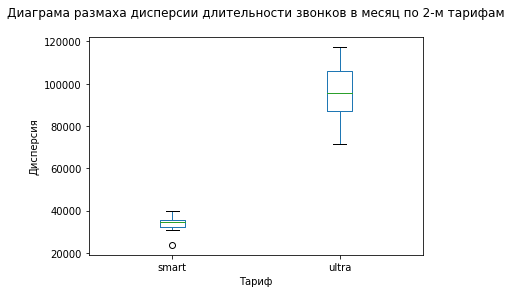

In [58]:
#смотрю диаграмму размаха дисперсии звонков
(df_new
 .pivot_table(index='tariff', columns='month', values='total_minutes', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграма размаха дисперсии длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Дисперсия')

plt.show()

График визуализирует на сколько больше.

Какой объем трафика требуется 
<a name="4.2"></a><br/>

In [59]:
# смотрю стредние значения по интернету 
df_new.pivot_table(index='tariff', columns='month', values='mb', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,15077.690651,18222.784561
std,2674.737763,2988.581755
min,8524.441176,11786.958333
25%,14712.763393,17374.929730
50%,15819.983437,19301.701363
75%,16668.772008,19869.952554
max,18136.833828,21813.589928


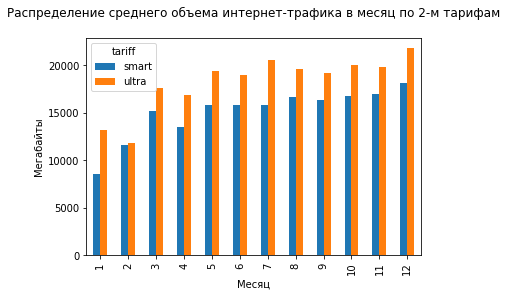

In [60]:
#строю гистограмму по месяцам 
(df_new
 .pivot_table(index='tariff', columns='month', values='mb', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=1)
)
plt.title('Распределение среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Мегабайты')

plt.show()

Здесь видно, что пользователи ultra пользуются интернетом больше и вообще график пользования интернетом очень похож на график звонков. 

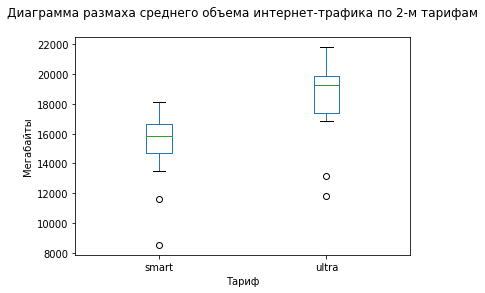

In [61]:
# рисую диаграмму размаха для среднего
(df_new
 .pivot_table(index='tariff', columns='month', values='mb', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего объема интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Мегабайты')

plt.show()

здесь видно, что в интернете эти тарифы похожи, но всё же пользователи ultra тратят больше гб 

In [62]:
std_internet = df_new.pivot_table(index='tariff', values='mb', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_internet

,mb
tariff,
smart,5877.576978
ultra,10096.317202
All,7578.261501


In [63]:
# считаю дисперсию 
var_internet = df_new.pivot_table(index='tariff', values='mb', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_internet

,mb
tariff,
smart,3.454591e+07
ultra,1.019356e+08
All,5.743005e+07


Эти графики ещё раз нам показывают, что у ultra отклонения гораздо больше

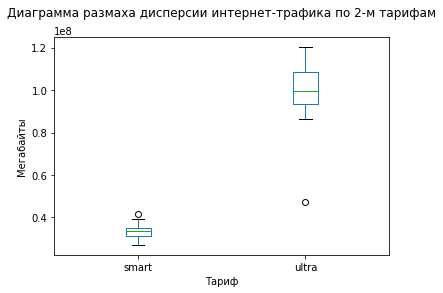

In [64]:
(df_new
 .pivot_table(index='tariff', columns='month', values='mb', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха дисперсии интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Мегабайты')

plt.show()

 C дисперсией все тоже самое. Значения находятся в разных концах рисунка и не пересекаются. То есть пользователи тарифа ultra тратят больше трафика и у них больший диапазон его использования

Сколько сообщений требуется каждый месяц
<a name="4.3"></a><br/>

In [65]:
df_new.pivot_table(index='tariff', columns='month', values='sms', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,31.413211,43.714983
std,5.103413,12.320470
min,18.235294,21.958333
25%,31.578125,33.407658
50%,33.638380,45.082721
75%,33.767242,53.162979
max,35.994065,60.611511


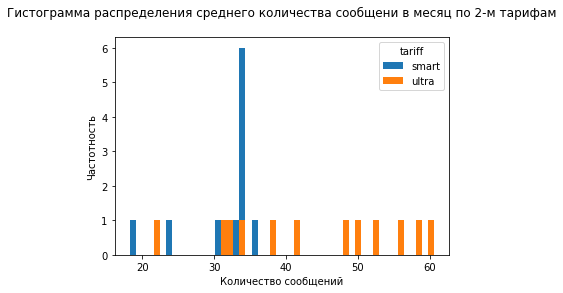

In [66]:
# строю гистограмму среднего количества сообщений по тарифам
(df_new
 .pivot_table(index='tariff', columns='month', values='sms', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=1, bins=50)
)
plt.title('Гистограмма распределения среднего количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

plt.show()

Здесь я наблюдаю, что наибольшое среднее количество сообщений в тарифе смарт около 35 в месяц

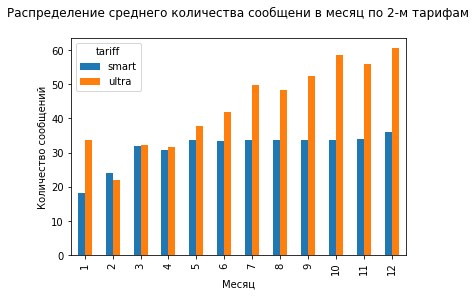

In [67]:
# график распределения сообщений пользователей по месяцам
(df_new
 .pivot_table(index='tariff', columns='month', values='sms', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=1)
)
plt.title('Распределение среднего количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')

plt.show()

На этом графике видно, что к концу года количество смс в тарице ultra растет, а у smart оно почти не меняется в течение года. Как с минутами и интернетом, так и с сообщениями пользователи ultra используют их больше.

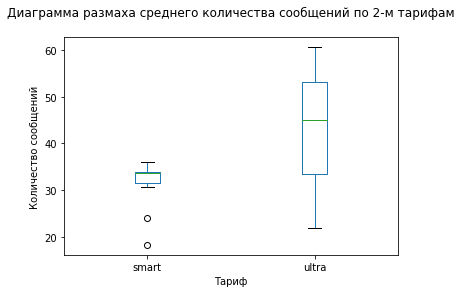

In [68]:
#делаю диаграмму размаха для средних значений сообщений
(df_new
 .pivot_table(index='tariff', columns='month', values='sms', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

У тарифа ultra гораздо больше диапозон значений от 15 до 60, а у smart маленький от 30 до 35.

In [69]:
# смотрю стандартное отклонение
std_message = df_new.pivot_table(index='tariff', values='sms', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_message

,sms
tariff,
smart,28.227876
ultra,47.804457
All,36.148326


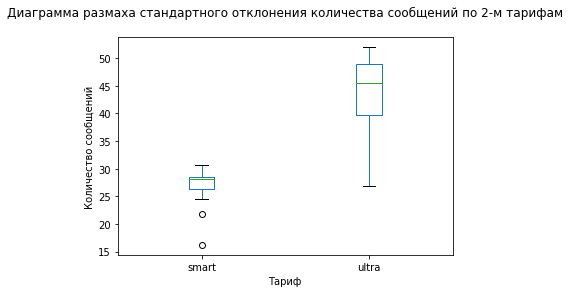

In [70]:
# рисую диаграмму стандартного отклонения
(df_new
 .pivot_table(index='tariff', columns='month', values='sms', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

In [71]:
#дисперсии количества сообщений
var_messages = df_new.pivot_table(index='tariff', values='sms', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_messages

,sms
tariff,
smart,796.812958
ultra,2285.266143
All,1306.701442


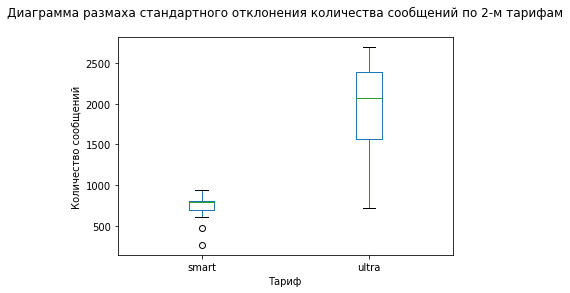

In [72]:
# график разброса дисперсии 
(df_new
 .pivot_table(index='tariff', columns='month', values='sms', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

Можно сделать вывод, что пользователи ультры расходуют больше трафика, минут и пишут больше сообщений и вообще являются более активными пользователями. Хотя в феврале они почти сравниваются по этим параметрам с пользователями smart.

 Расчет стоимости услуг по тарифам
 <a name="4.4"></a><br/>

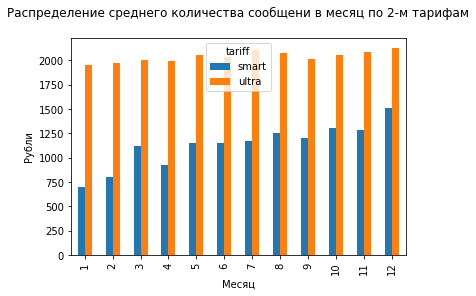

In [73]:
# график распределения дохода от пользователей по месяцам
(df_new
 .pivot_table(index='tariff', columns='month', values='bill', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=1)
)
plt.title('Распределение среднего количества сообщени в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли')

plt.show()

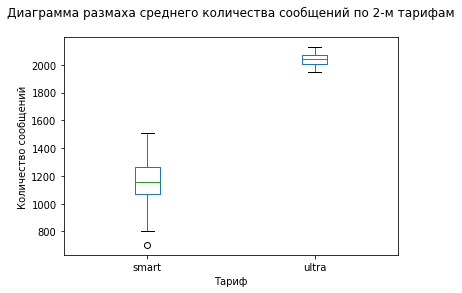

In [74]:
#делаю диаграмму размаха для средних значений сообщений
(df_new
 .pivot_table(index='tariff', columns='month', values='bill', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')

plt.show()

Здесь я вижу, что пользователи ultra тратят больше денег на связь в районе 2000 рублей в месяц, а пользователи smart меньше, но их траты менее стабильны от 700 до 1500 рублей.

>**<span style="color:red">~~Здесь все в целом хорошо, но в задании просили построить именно гистограммы. Нужно построить гистограммы по звонкам, минутам и интернет-сессиям для пользователей двух тарифов и описать полученные типы распределений (на какие известные нам распределения похожи наши гистограммы?), при этом необходимо построить гистограммы не по усредненным данным, а по всем имеющимся у нас данным. Кроме этого будет хорошо, если ты добавишь к этому шагу развернутый промежуточный вывод, в котором опишешь сколько в среднем используют услуг пользователи двух тарифов, много ли клиентов не укладывается в лимитные ограничения и так далее. Доработай, пожалуйста.~~</span>**

>**<span style="color:orange">~~С точки зрения стиля и нашей задачи, будет классно, если ты построишь наши гистограммы по двум тарифам с наложением друг на друга (чтобы они полностью не перекрывали друг друга можно сделать их полупрозрачными) — тогда мы сможем сравнить два тарифа в едином масштабе.~~</span>**

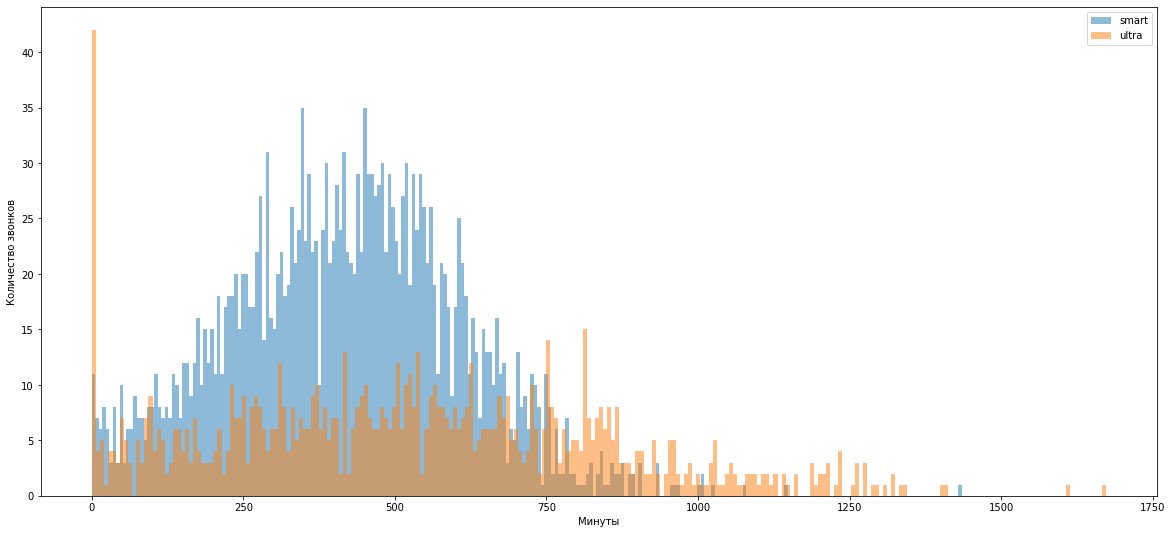

In [75]:
# Гистограмма распределения длительности звонков в месяц
fig, ax = plt.subplots()
ax.hist(df_new.query('tariff == "smart"')['total_minutes'],bins=250, alpha=0.5, label='smart')
ax.hist(df_new.query('tariff == "ultra"')['total_minutes'],bins=250, alpha=0.5, label='ultra')
fig.set_figwidth(20)
fig.set_figheight(9)
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество звонков')
plt.legend()
plt.show()


Здесь я вижу, что абоненты ultra разговаривают дольше, чем абоненты smart, а абоненты smart совершаю больше звонков. Видно и то, что почти половина пользоватлей smart выходят за рамки тарифа и разоваривают больше 500 минут. Соответсвенно переплачивают. А вот пользователи ultra наоборот не договаривают и до 2000 из 3000.

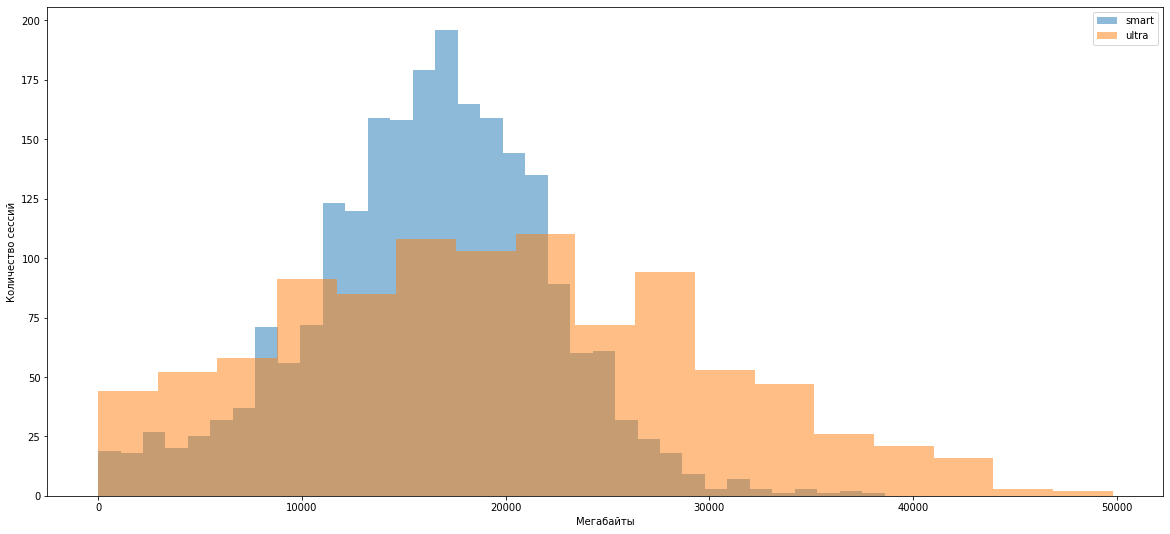

In [76]:
# Гистограмма распределения интернета
fig, ax = plt.subplots()
ax.hist(df_new.query('tariff == "smart"')['mb'],bins='auto', alpha=0.5, label='smart')
ax.hist(df_new.query('tariff == "ultra"')['mb'],bins='auto', alpha=0.5, label='ultra')
fig.set_figwidth(20)
fig.set_figheight(9)
ax.set_xlabel('Мегабайты')
ax.set_ylabel('Количество сессий')
plt.legend()
plt.show()

Точно такая же ситуация с интернетом. Хотя здесь переплачивают и пользователи ultra.

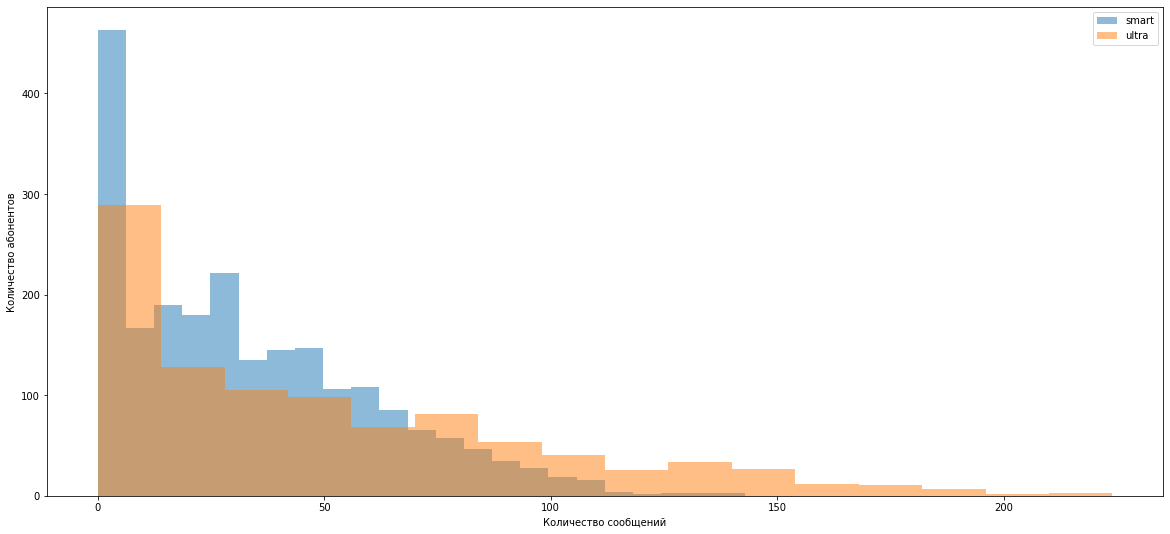

In [77]:
# Гистограмма распределения сообщений
fig, ax = plt.subplots()
ax.hist(df_new.query('tariff == "smart"')['sms'],bins='auto', alpha=0.5, label='smart')
ax.hist(df_new.query('tariff == "ultra"')['sms'],bins='auto', alpha=0.5, label='ultra')
fig.set_figwidth(20)
fig.set_figheight(9)
ax.set_xlabel('Количество сообщений')
ax.set_ylabel('Количество абонентов')
plt.legend()
plt.show()

Из-за того что информация о сообщениях структурирована иначе, получается другой вид графика. Здесь видно, что существенное количество пользователей smart выходят за рамки тарифа и платят больше, а пользователи ultra не расходуют 1/5 всего лимита.

>>**<span style="color:green">Update: Теперь все отлично, но на будущее не забывай, пожалуйста, и про заголовки графиков. Также не увидел у тебя описаний полученный распределений, здесь это не критично, но не можно было попрактиковаться в определении типа распределения "на глаз".</span>**

## Проверка гипотез
<a name="5."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
<a name="5.1"></a><br/>


Формулирую две гипотезы: 
    * Нулевая: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
    * Альтернативная: средняя выручка пользователей тарифов «Ультра» и «Смарт» разлечаются.

In [78]:
tariff_smart = df_new.query('tariff == "smart"')
print(np.var(tariff_smart['bill']))
tariff_ultra = df_new.query('tariff == "ultra"')
print(np.var(tariff_ultra['bill']))

619947.3501724182
126740.64659640804


In [79]:
# я взял кртерий в один процент, так как ясчитаю его достаточно подходящим для такой выборке.
alpha = .01
results = st.ttest_ind(tariff_smart['bill'], tariff_ultra['bill'],equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.")

p-значение: 5.133013116078655e-296
Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.


<a name="5.2"></a><br/>
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формулирую две гипотезы: 
    * Нулевая: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
    * Альтернативная: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [80]:
moscow = df_new.query('city == "Москва"')
not_moscow = df_new.query('city != "Москва"')

In [81]:
# я взял кртерий в один процент, так как я считаю его достаточно подходящим для такой выборке.
alpha = 0.01 
results = st.ttest_ind(moscow['bill'], not_moscow['bill'],equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.")

p-значение: 0.4546446281204245
Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.


>**<span style="color:red">~~С формулировкой и проверкой гипотез у тебя полный порядок, но нам нужно посчитать дисперсии наших выборок и учесть это при проведении теста, передав в параметр `equal_var` соответствующее значение (True или False). Обычно принято считать дисперсии отличными друг от друга, если они отличаются более чем на 5%, но в статистике есть специальные критерии (Левене, Бартлетта), которые позволяют проверить гипотезы о однородности дисперсий двух выборок. С этими критериями и их реализацией в пакете `stats` ты можешь ознакомиться самостоятельно.~~</span>**

>**<span style="color:blue"> Так как у выборка у нас больше 50 и дисперсии отличаются, я поставил значение equal_var = False. </span>**

Вывод:
<a name="6."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Я считаю, что вкладываться нужно в тариф ultra так как у него меньше пользователей, но он приносит в среднем больше денег. Расходы по тарифу ultra гораздо стабильнее и выше в районе 2000 тысяч рублей в отличии от тарифа smart с нестабильным расходом на связь от 700 рублей. Потребление связи в регионах и в Москве не отличаются, поэтому не обязательно делать какие-то специальные предложения для других городов. Я бы сделал ещё сделал специальный средний тариф.(возможно, он есть) Так как разрыв между 700 рублями и 2000 рублей, мне кажется, непропорцианально большим, то есть пользователи smart не расходуют трафика на 2000, но и 550 рублей им не достаточно.

>**Спасибо тебе за сдачу твоего проекта. Работа получилась просто замечательная и хорошо структурированная. Видно, что ты отлично справился с материалами спринта и уверенно применяешь полученные навыки на практике. Для зачёта проекта тебе осталось совсем чуть-чуть поработать и исправить ряд недочётов в твоей работе.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта, твой чистый код и развернутые выводы и комментарии. Продолжай и дальше совершенствоваться в этих аспектах в своих последующих проектах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**

>>**Update: Привет еще раз! Спасибо тебе за оперативную и качественную работу по устранению недочётов. Теперь все точно отлично, и твой проект зачтен. Поздравляю! ;)**


In [84]:
import seaborn as sns

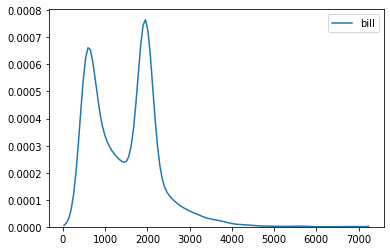

In [86]:
sns_plot = sns.kdeplot(not_moscow['bill'])
fig = sns_plot.get_figure()